In [1]:
#!pip install wordcloud
#!pip install fileupload
#!pip install ipywidgets
#!jupyter nbextension install --py --user fileupload
#!jupyter nbextension enable --py fileupload

from wordcloud import WordCloud
import re
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from nltk import word_tokenize
import itertools
import nltk
import seaborn as sns
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [2]:
#Reading both the text files
T1=open("NLP_TXT_1.txt").read()
T2=open("NLP_TXT_2.txt").read()

In [3]:
#Tokenizing the text files
list1=nltk.word_tokenize(T1)
list2=nltk.word_tokenize(T2)

In [4]:
#Data Preprocessing starts

#Removing Unwanted words from starting
n1=len(list1)
temp1=0
for i in range(n1):
    if list1[i]=='publication' and list1[i+1]=='was' and list1[i+2]=='renewed':
        temp1=i+4

n2=len(list2)
temp2=0
for i in range(n2):
    if list2[i]=='publication' and list2[i+1]=='was' and list2[i+2]=='renewed':
        temp2=i+4

In [5]:
for i in range(0,temp1+1):
    list1.pop(0)
    
for i in range(0,temp2+1):
    list2.pop(0)

In [6]:
#Removing Unwanted words from the end
index1=0
for i in range(n1):
    if list1[i]=='END' and list1[i+1]=='OF' and list1[i+2]=='THE' and list1[i+3]=='PROJECT':
        index1=i
        break
        
index2=0
for i in range(n2):
    if list2[i]=='END' and list2[i+1]=='OF' and list2[i+2]=='THE' and list2[i+3]=='PROJECT':
        index2=i
        break

In [7]:
new_n1=len(list1)
for i in range(new_n1,index1-3,-1):
    list1.pop()
    
new_n2=len(list2)
for i in range(new_n2,index2-3,-1):
    list2.pop()

In [8]:
#Removing star (*) from the data set
new_size1=len(list1)
count1=0
for i in range(new_size1):
    if list1[i]=='*':
        count1+=1
for i in range(count1):
    list1.remove('*')
    
new_size2=len(list2)
count2=0
for i in range(new_size2):
    if list2[i]=='*':
        count2+=1
for i in range(count2):
    list2.remove('*')
    

In [9]:
#Lowering all the characters
l_list1=[char.lower() for char in list1]
l_list2=[char.lower() for char in list2]

#Removing punctuation marks from the dataset
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
for char in l_list1:
    if char in punctuations:
        l_list1.remove(char)
        
for char in l_list2:
    if char in punctuations:
        l_list2.remove(char)

In [10]:
#According to our observation, Lemmatization gives better result
x=int(input('If you want to lemmatize your model then press 1. If you want to use stemming then press 2 : '))

If you want to lemmatize your model then press 1. If you want to use stemming then press 2 : 1


In [11]:
#Lemmatization and stemming
if x==1:
    lemmatizer = WordNetLemmatizer()
    final_list1=[lemmatizer.lemmatize(char) for char in l_list1]
    final_list2=[lemmatizer.lemmatize(char) for char in l_list2]
else:
    Stemmer=PorterStemmer()
    final_list1=[Stemmer.stem(char) for char in l_list1]
    final_list2=[Stemmer.stem(char) for char in l_list2]

In [12]:
#Plotting graph with a list() parameter
def plot_freq(result):
    plt.bar(range(len(result.keys())), list(result.values()), align='center',width=0.3)
    plt.xticks(range(len(result)), list(result.keys()),rotation='vertical')
    plt.figure(figsize=(100,100))
    plt.show()

In [13]:
#Calculating the frequency words
dic1={}
for key in final_list1:
    try:
        dic1[key]+=1
    except:
        dic1[key]=1
        
dic2={}
for key in final_list2:
    try:
        dic2[key]+=1
    except:
        dic2[key]=1

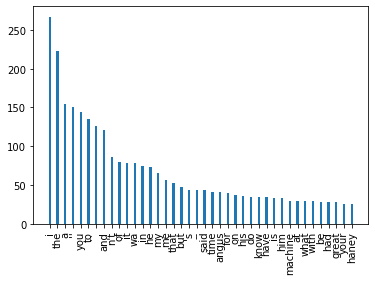

<Figure size 7200x7200 with 0 Axes>

In [14]:
#Using only top 40 frequncies for plotting graph

sorted_freq={k: v for k, v in sorted(dic1.items(), key=lambda item: item[1],reverse=True)}
sorted_freq=dict(itertools.islice(sorted_freq.items(), 40))
plot_freq(sorted_freq)

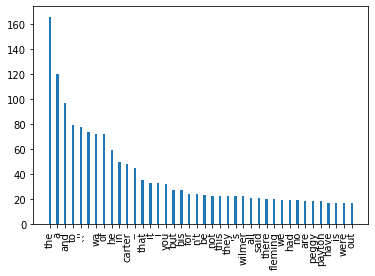

<Figure size 7200x7200 with 0 Axes>

In [15]:
sorted_freq={k: v for k, v in sorted(dic2.items(), key=lambda item: item[1],reverse=True)}
sorted_freq=dict(itertools.islice(sorted_freq.items(), 40))
plot_freq(sorted_freq)

In [16]:
#initializing stop words
stop_words=set(stopwords.words("english"))

In [17]:
#Data set without stop words
filtered_s1=[]
for word in final_list1:
    if word not in stop_words:
        filtered_s1.append(word)

filtered_s2=[]
for word in final_list2:
    if word not in stop_words:
        filtered_s2.append(word)

In [18]:
#Calculating the frequency words without stop words
dic3={}
for key in filtered_s1:
    try:
        dic3[key]+=1
    except:
        dic3[key]=1
        
dic4={}
for key in filtered_s2:
    try:
        dic4[key]+=1
    except:
        dic4[key]=1

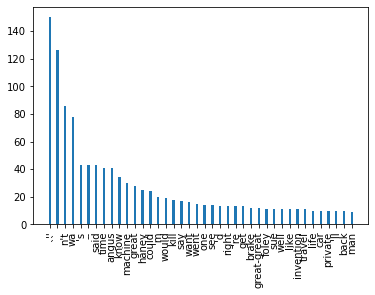

<Figure size 7200x7200 with 0 Axes>

In [19]:
#Using only top 40 frequncies for plotting graph without stop words
sorted_freq={k: v for k, v in sorted(dic3.items(), key=lambda item: item[1],reverse=True)}
sorted_freq=dict(itertools.islice(sorted_freq.items(), 40))
plot_freq(sorted_freq)

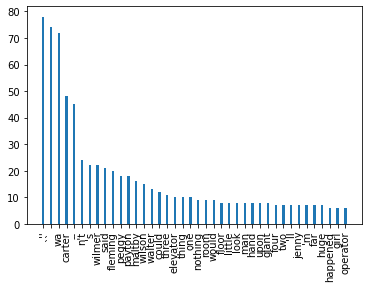

<Figure size 7200x7200 with 0 Axes>

In [20]:
sorted_freq={k: v for k, v in sorted(dic4.items(), key=lambda item: item[1],reverse=True)}
sorted_freq=dict(itertools.islice(sorted_freq.items(), 40))
plot_freq(sorted_freq)

In [21]:
#Creating word cloud using original datasets
WordC1=' '.join(final_list1)
wc1=WordCloud().generate(WordC1)

WordC2=' '.join(final_list2)
wc2=WordCloud().generate(WordC2)

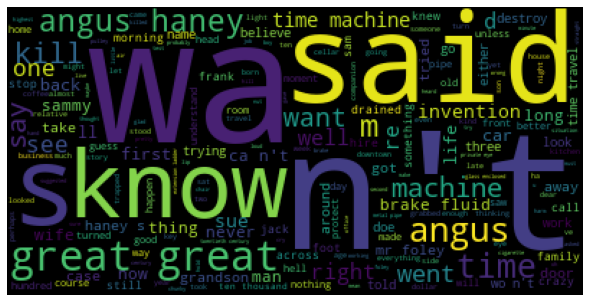

In [22]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc1)
plt.axis("off")
plt.tight_layout(pad = 0)

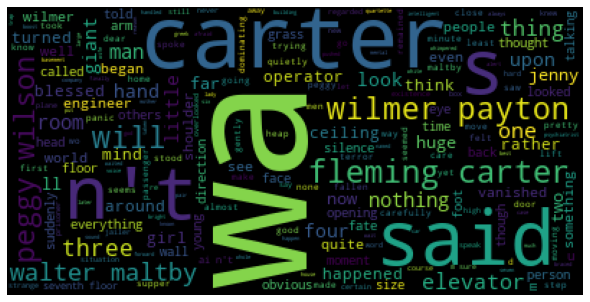

In [23]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc2)
plt.axis("off")
plt.tight_layout(pad = 0)

In [24]:
#Creating word cloud using original datasets without stop words
WordC3=' '.join(filtered_s1)
wc3=WordCloud().generate(WordC3)

WordC4=' '.join(filtered_s2)
wc4=WordCloud().generate(WordC4)

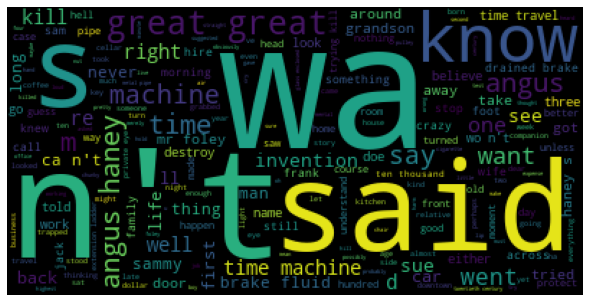

In [25]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc3)
plt.axis("off")
plt.tight_layout(pad = 0)

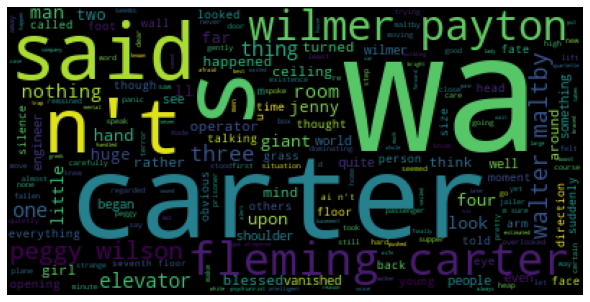

In [26]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc4)
plt.axis("off")
plt.tight_layout(pad = 0)

In [27]:
#Evaluating word length vs frequency 
dic5={}
for char in l_list1:
    try:
        dic5[len(char)]+=1
    except:
        dic5[len(char)]=1

dic5 = dict(sorted(dic5.items(), key=lambda x:x[0])) #Converts to a list of tuples and sort

dic6={}
for char in l_list2:
    try:
        dic6[len(char)]+=1
    except:
        dic6[len(char)]=1

dic6 = dict(sorted(dic6.items(), key=lambda x:x[0])) #Converts to a list of tuples and sort

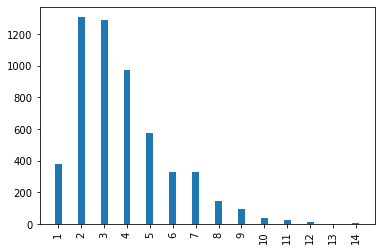

<Figure size 7200x7200 with 0 Axes>

In [28]:
plot_freq(dic5)

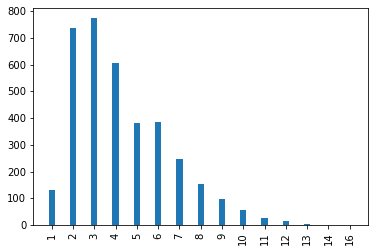

<Figure size 7200x7200 with 0 Axes>

In [29]:
plot_freq(dic6)

In [30]:
#PoS tagging of the datasets with and without stop words
tagged1=nltk.pos_tag(final_list1)
tagged2=nltk.pos_tag(final_list2)
tagged3=nltk.pos_tag(filtered_s1)
tagged4=nltk.pos_tag(filtered_s2)

In [31]:
#Frequency distribution among PoS tags
dic7={}
for tup in tagged1:
    try:
        dic7[tup[1]]+=1
    except:
        dic7[tup[1]]=1
dic8={}
for tup in tagged2:
    try:
        dic8[tup[1]]+=1
    except:
        dic8[tup[1]]=1
dic9={}
for tup in tagged3:
    try:
        dic9[tup[1]]+=1
    except:
        dic9[tup[1]]=1
dic10={}
for tup in tagged4:
    try:
        dic10[tup[1]]+=1
    except:
        dic10[tup[1]]=1